# Anomaly Detection Pipeline – Converted from main.py

In [1]:
import os
import pandas as pd
from config import DEVICES_DATA_PATH, SAVED_MODELS_PATH, global_start_time, process, start_memory
from device_utils import get_device_files, get_model_name, get_numerical_features
from state_anomaly import detect_state_anomalies
# Removed imports for RF classifier (apply_random_forest, train_rf_for_device) as they belong to IC or are no longer used here
from plotting import plot_reconstruction_error # Only import the AD plot
from export_json import export_incident_json # Keep this to generate anomalies_output.json

In [2]:
# Define the process_device function
def process_device(device_type, csv_file_path): # Changed parameter name to csv_file_path for clarity
    """
    Process a device's data and apply anomaly detection.
    """
    print(f"\n{'=' * 50}")
    print(f"Processing device: {device_type}")
    print(f"{'=' * 50}\n")

    device_start_time = pd.Timestamp.now()
    df_all = pd.DataFrame() # This will collect processed data from all states

    try:
        df = pd.read_csv(csv_file_path) # csv_file_path is already a full path
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        available_features = get_numerical_features(df)

        if not available_features:
            print(f"⚠️ {device_type} - No numeric features detected.")
            return None

        print(f"{device_type} - Auto-detected features: {available_features}")

        # Process each state using LSTM
        for state in df['state'].unique():
            model_name = get_model_name(device_type, state)
            model_path = os.path.join(SAVED_MODELS_PATH, model_name)

            if not os.path.exists(model_path):
                print(f"⚠️ Missing model for {device_type} state: {state}")
                continue

            df_state = df[df['state'] == state].copy()
            df_processed = detect_state_anomalies(df_state, model_path, available_features)

            # Concatenate processed state data, only if it has reconstruction_error
            if 'reconstruction_error' in df_processed.columns:
                df_all = pd.concat([df_all, df_processed], ignore_index=True)
            else:
                print(f"⚠️ {device_type} - State {state} processed, but 'reconstruction_error' column is missing. Skipping concatenation.")


        if df_all.empty:
            print(f"⚠️ {device_type} - No data processed for any state. Skipping further steps.")
            return None

        df_all.sort_values('timestamp', inplace=True)
        df_all.reset_index(drop=True, inplace=True)

        # Removed RF classifier application (as it's part of IC or removed)
        # df_all = apply_random_forest(df_all, device_type)

        # --- DEBUG: is_anomaly counts BEFORE JSON export ---
        print(f"\n--- DEBUG: {device_type} is_anomaly counts BEFORE JSON export ---")
        if 'is_anomaly' in df_all.columns:
            print(df_all['is_anomaly'].value_counts())
        else:
            print("'is_anomaly' column not found in df_all!")
        print("--------------------------------------------------")

        # ✅ Only plot reconstruction error
        # This function should be in the plotting.py of the AD repo
        plot_reconstruction_error(df_all, device_type, "All States")

        # ✅ Export JSON output for downstream systems
        # This will now export all processed data points (with error and is_anomaly)
        export_incident_json(df_all, device_type)


        print(f"✅ Finished {device_type} in {(pd.Timestamp.now() - device_start_time).total_seconds():.2f} sec")
        return df_all

    except Exception as e:
        print(f"❌ Error processing {device_type}: {str(e)}")
        import traceback # Import traceback here for debugging
        traceback.print_exc() # Print full traceback for debugging
        return None


Processing device: bale_counter

bale_counter - Auto-detected features: ['average_weight', 'bales', 'total_weight']
Threshold for c:\Users\Thomas\Desktop\AnomalyDetection\anomaly-detection\src\pipeline\../../storage/saved_models/lstm_off_bale_counter.h5: 0.000000 (99.5th percentile)
DEBUG: After thresholding, anomaly_flags unique values: [False]
DEBUG: After thresholding, count of True flags: 0
DEBUG: Final flags assigned to df_state, unique values: [False]
DEBUG: Final flags assigned to df_state, count of True flags: 0
Threshold for c:\Users\Thomas\Desktop\AnomalyDetection\anomaly-detection\src\pipeline\../../storage/saved_models/lstm_idle_bale_counter.h5: 0.020992 (99.5th percentile)
DEBUG: After thresholding, anomaly_flags unique values: [False  True]
DEBUG: After thresholding, count of True flags: 8
DEBUG: Final flags assigned to df_state, unique values: [False  True]
DEBUG: Final flags assigned to df_state, count of True flags: 8
Threshold for c:\Users\Thomas\Desktop\AnomalyDetec

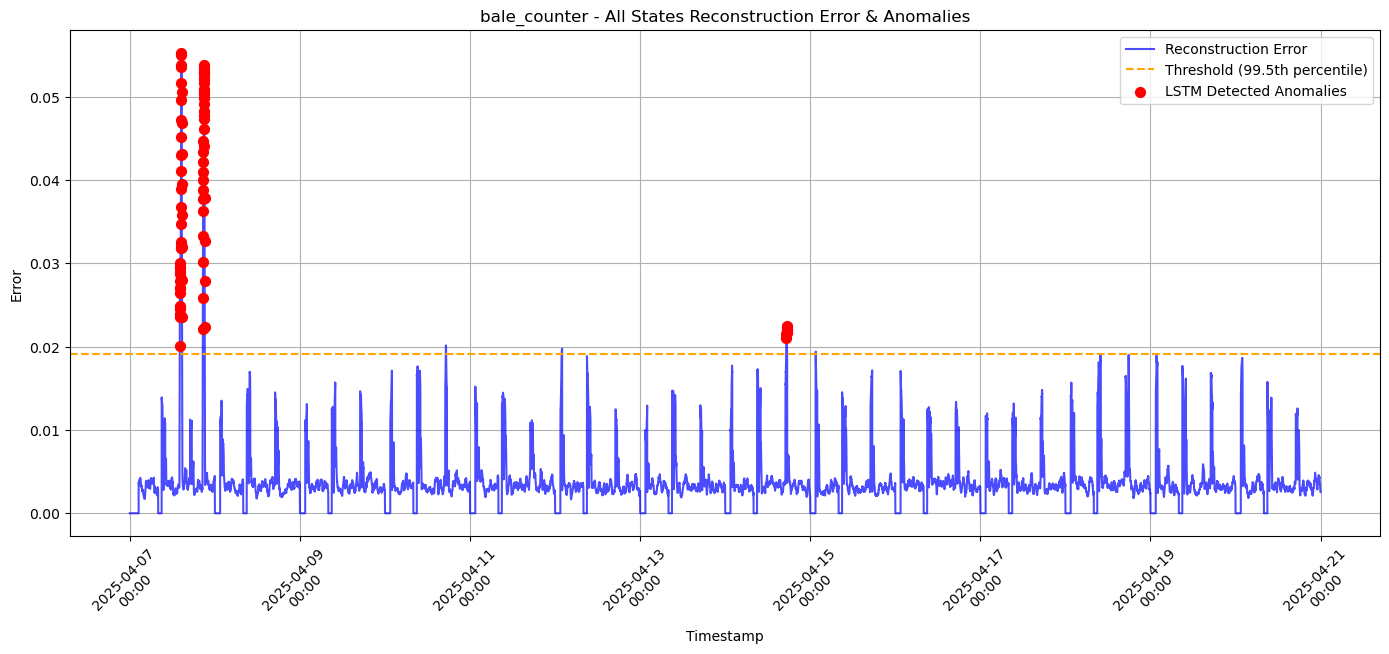

📤 Exported 20146 records for bale_counter to JSON
✅ Finished bale_counter in 6.22 sec

Processing device: motor_monitor

motor_monitor - Auto-detected features: ['power', 'rpm', 'temperature', 'vibration']
Threshold for c:\Users\Thomas\Desktop\AnomalyDetection\anomaly-detection\src\pipeline\../../storage/saved_models/lstm_off.h5: 0.050289 (99.5th percentile)
DEBUG: After thresholding, anomaly_flags unique values: [False  True]
DEBUG: After thresholding, count of True flags: 1
DEBUG: Final flags assigned to df_state, unique values: [False  True]
DEBUG: Final flags assigned to df_state, count of True flags: 1
Threshold for c:\Users\Thomas\Desktop\AnomalyDetection\anomaly-detection\src\pipeline\../../storage/saved_models/lstm_idle.h5: 0.065556 (99.5th percentile)
DEBUG: After thresholding, anomaly_flags unique values: [False  True]
DEBUG: After thresholding, count of True flags: 1
DEBUG: Final flags assigned to df_state, unique values: [False  True]
DEBUG: Final flags assigned to df_state

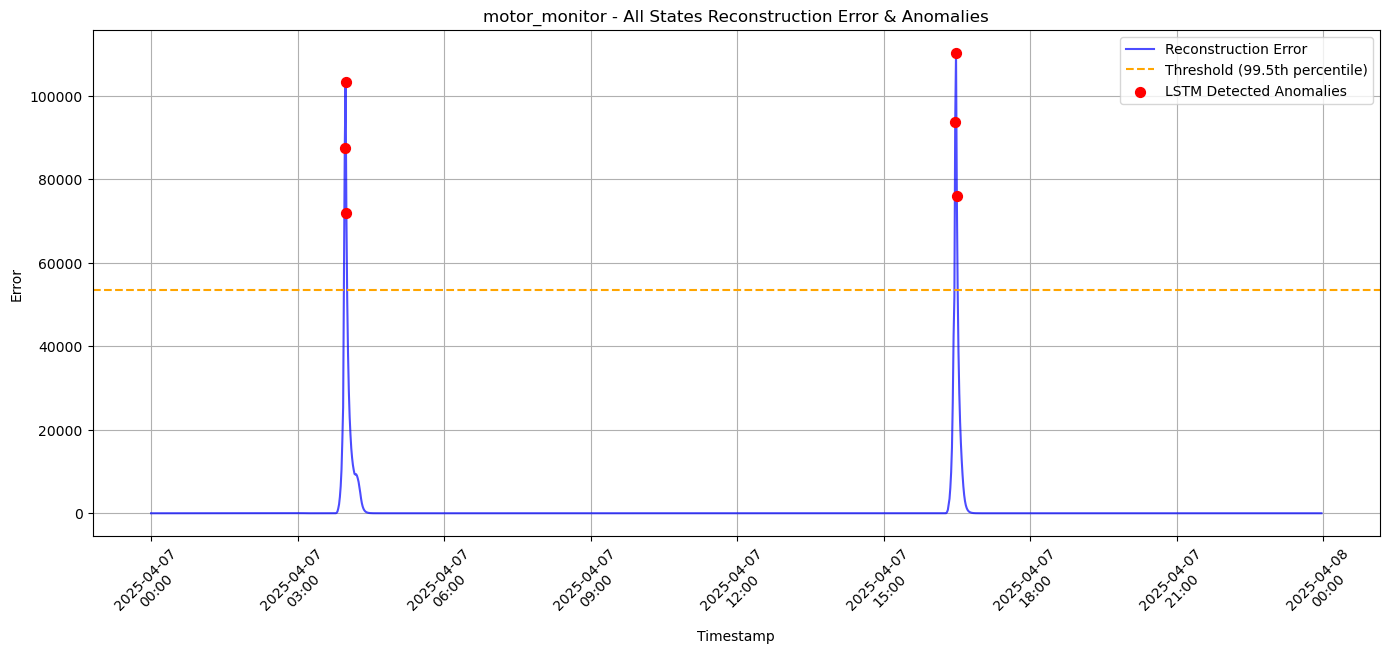

📤 Exported 1439 records for motor_monitor to JSON
✅ Finished motor_monitor in 2.61 sec

Processing device: output_sensor

output_sensor - Auto-detected features: ['output']
Threshold for c:\Users\Thomas\Desktop\AnomalyDetection\anomaly-detection\src\pipeline\../../storage/saved_models/lstm_long_fiber.h5: 0.026203 (99.5th percentile)
DEBUG: After thresholding, anomaly_flags unique values: [False  True]
DEBUG: After thresholding, count of True flags: 11
DEBUG: Final flags assigned to df_state, unique values: [False  True]
DEBUG: Final flags assigned to df_state, count of True flags: 11
Threshold for c:\Users\Thomas\Desktop\AnomalyDetection\anomaly-detection\src\pipeline\../../storage/saved_models/lstm_short_fiber.h5: 0.039669 (99.5th percentile)
DEBUG: After thresholding, anomaly_flags unique values: [False  True]
DEBUG: After thresholding, count of True flags: 8
DEBUG: Final flags assigned to df_state, unique values: [False  True]
DEBUG: Final flags assigned to df_state, count of True f

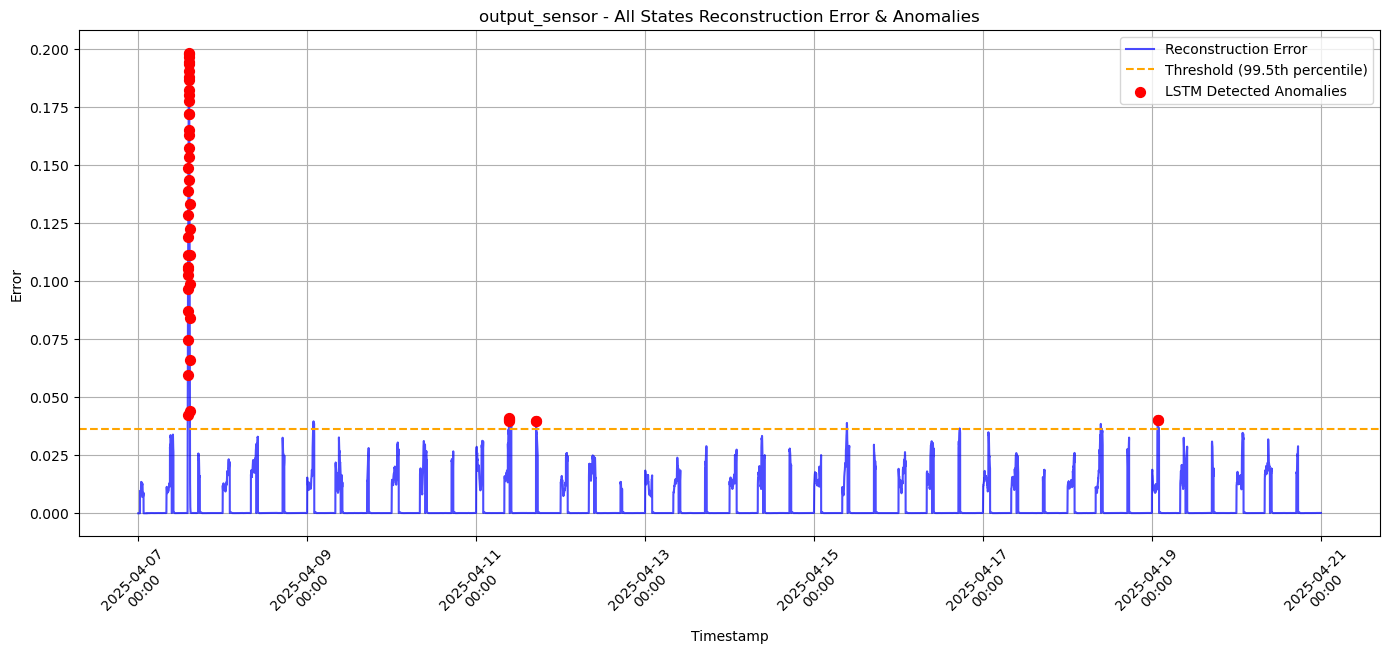

📤 Exported 20146 records for output_sensor to JSON
✅ Finished output_sensor in 6.12 sec

Processing device: temperature_sensor

temperature_sensor - Auto-detected features: ['temperatureSensor1']
Threshold for c:\Users\Thomas\Desktop\AnomalyDetection\anomaly-detection\src\pipeline\../../storage/saved_models/lstm_off_temperature_sensor.h5: 0.000000 (99.5th percentile)
DEBUG: After thresholding, anomaly_flags unique values: [False]
DEBUG: After thresholding, count of True flags: 0
DEBUG: Final flags assigned to df_state, unique values: [False]
DEBUG: Final flags assigned to df_state, count of True flags: 0
Threshold for c:\Users\Thomas\Desktop\AnomalyDetection\anomaly-detection\src\pipeline\../../storage/saved_models/lstm_idle_temperature_sensor.h5: 0.000000 (99.5th percentile)
DEBUG: After thresholding, anomaly_flags unique values: [False]
DEBUG: After thresholding, count of True flags: 0
DEBUG: Final flags assigned to df_state, unique values: [False]
DEBUG: Final flags assigned to df_s

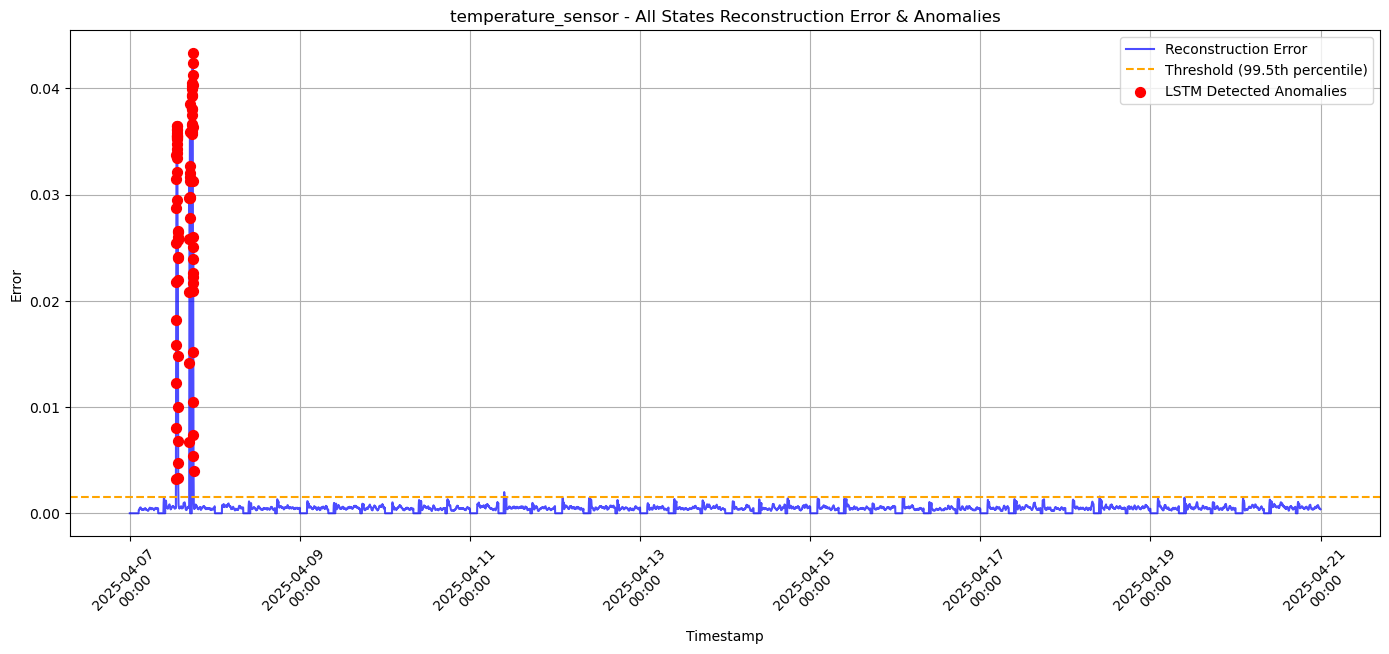

📤 Exported 20146 records for temperature_sensor to JSON
✅ Finished temperature_sensor in 6.56 sec

✅ ALL DEVICES PROCESSED
⏱️ Total Time: 26.52 sec
💾 Start Memory: 110.27 MB
💾 End Memory: 574.22 MB
📈 Memory Growth: 463.95 MB


In [3]:
# --- Main execution flow ---
device_files = get_device_files()
all_results = {}

for device_type, csv_file_path in device_files: # get_device_files now returns full_path
    result = process_device(device_type, csv_file_path)
    if result is not None:
        all_results[device_type] = result

# Removed RF training loop as RF classifier is being removed from AD repo
# for device_name, df_result in all_results.items():
#     train_rf_for_device(device_name, df_result)

import time # Re-import time if needed for global_end_time

global_end_time = time.time()

end_memory = process.memory_info().rss / (1024 * 1024)

print("\n✅ ALL DEVICES PROCESSED")
print(f"⏱️ Total Time: {global_end_time - global_start_time:.2f} sec")
print(f"💾 Start Memory: {start_memory:.2f} MB")
print(f"💾 End Memory: {end_memory:.2f} MB")
print(f"📈 Memory Growth: {end_memory - start_memory:.2f} MB")